In [36]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import os, sys
sys.path.append("..")
sys.path.append("../external/generators/")

import matplotlib.pyplot as plt
from matplotlib import gridspec

from figure5 import Figure5

In [38]:
import yaml
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import sklearn.metrics
from matplotlib.ticker import NullFormatter


def make_figure(metric='mlae'):

    with open("results.yml", "r") as file:
        data = yaml.safe_load(file)

    fig = plt.figure(figsize=(15,9), facecolor='white', constrained_layout=True)
    gs = gridspec.GridSpec(4, 4, hspace=.3, figure=fig)

    grid_spec_index = 0

    y_positions = [2, 1, 0, -1]

    possible_metrics = ['mlae', 'msqr_error']

    for experiment in list(data.keys()):

        fig.add_subplot(gs[grid_spec_index])
        grid_spec_index += 1

        plt.title(experiment.replace('_', " ").upper())

        ax = plt.gca()
        from matplotlib.ticker import NullFormatter
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_ticks_position('none') 
        plt.tight_layout()

        func = getattr(Figure5, experiment)

        image = func([True,False,False])[1]
        image = image.astype(np.float32)

        image = np.where(image >= 1, 1, 0)

        #ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_xticks(np.arange(-.5, 150, 10), minor=False)
        ax.set_yticks(np.arange(-.5, 100, 10), minor=False)

        ax.set_axisbelow(True)
        plt.imshow(image, cmap='Greys', interpolation='none')

        fig.add_subplot(gs[grid_spec_index])
        grid_spec_index += 1

        max_val = float("-inf")

        for i, network in enumerate(data[experiment].keys()):

            means = data[experiment][network][metric]
            means = np.array(means)

            confidence = bs.bootstrap(means, stat_func=bs_stats.std).value*1.96
            
            y_pos = y_positions[i]
            x_pos = np.mean(means)

            new_max = x_pos + confidence

            if new_max > max_val:
                max_val = new_max


            # grid lines for X
            plt.grid(True, color='gray', which='major', axis='x', alpha=1)
            plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

            n_color = 'C'+str(i)

            errorbars = plt.errorbar([x_pos], [y_pos], xerr=[confidence], fmt='o', color=n_color, label=network)

        if experiment == "curvature":
            plt.legend(loc='right')
        
        max_val = int(max_val)
        
        if max_val < 6:
            max_val = 6
        
        if metric == "mlae":
            max_val = 6
        
        if metric == "msqr_error":
            max_val = 50


        plt.xlim(-1, max_val+(max_val/60))

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_yaxis().set_ticks([])



        ax.get_xaxis().set_ticks(np.arange(-1, max_val+1, max_val+1)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(0,0.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)

        # remove tick marks
        #ax.xaxis.set_major_formatter(NullFormatter())
        #ax.xaxis.set_ticks_position('none')
    plt.savefig(metric + '.png', bbox_inches='tight', pad_inches=0)


/home/jwfree/anaconda3/envs/CLASSIFIER/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


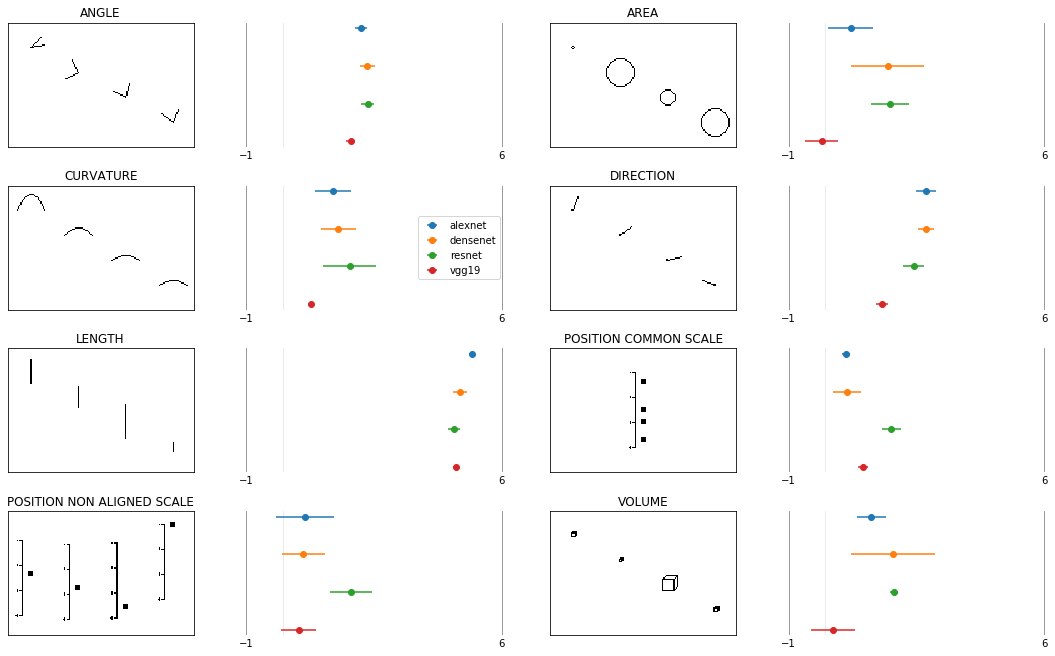

In [41]:
make_figure("mlae")

/home/jwfree/anaconda3/envs/CLASSIFIER/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


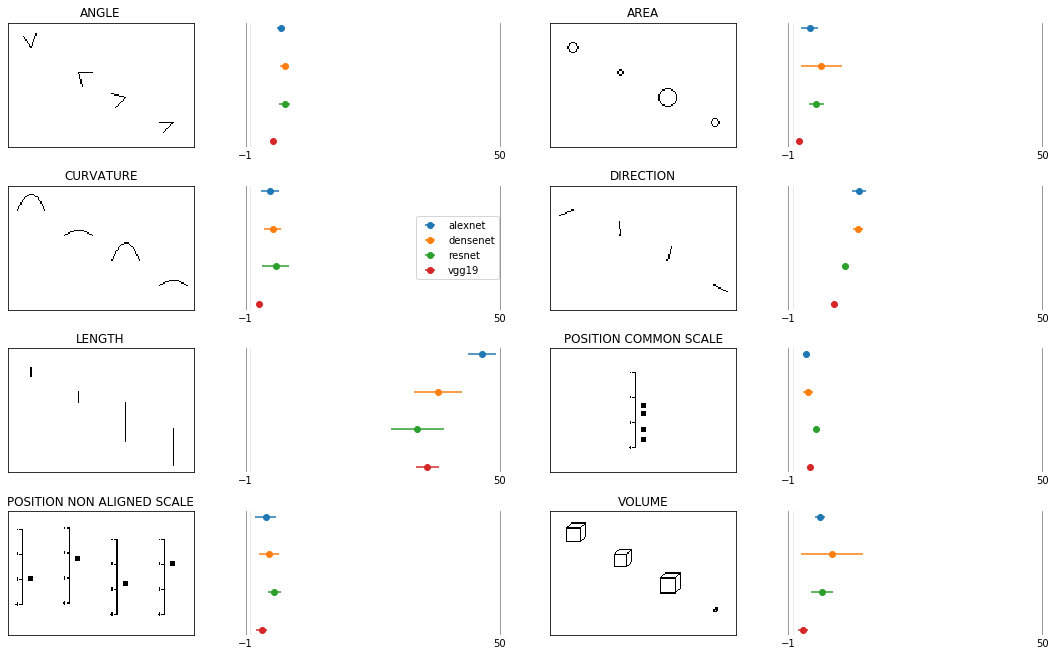

In [42]:
make_figure("msqr_error")